In [4]:
# This takes a minute

from application import *

# How long do people stay in Effective Altruism?

Effective Altruism is clearly regarded as a life project by a substantial number of community members. 80 000 hours, one of the most prominent EA organisations, offers advice about how to do a lot of good over one's entire working career. Giving What We Can asks people to pledge 10% of their income from the day signed until the day they retire to organisations that can use it effectively to improve the lives of others. From personal conversations and reading I've done online, it is also clear to me that many individual community members think that "doing the most good" is a key consideration for planning the rest of their life, at least for the time being.

While the absolute number of people in EA who regard it as a life project is clearly substantial, it is much less clear what proportion of people involved in EA share this outlook and are likely to stay around for the long term. This is an important question for organisations that consider making investments in EA community members to benefit EA causes, but that might not pay off for many years. Consider, hypothetically, making study grants to EA community members. How many of these people will still be working on causes they consider important in 10 years time?

Individuals may face similar decisions - should they invest their time and money now in projects that might not pay off for some time, or should they try to make the largest direct contribution possible in the next few years because they suspect they might priorities EA as highly in the future?

There is no direct evidence for how likely people are to stay in EA for multiple decades because EA has only been around for just over 10 years. However, using data from the EA survey in combination with estimates of the size of the entire movement, we can estimate how likely it is for someone who has been involved in EA for 1-3 years to continue to be involved for another year. This might be sufficient for some short-term investment decisions, and if we find a clear trend we can also consider extrapolating it to try to forecast long run retention rates.

Before reporting the headline results, a word of caution: these results run counter to expectations and the chance that this is due to an error or problem with the data is high (my baseline judgement of the likelihood of error is 60%, and this should be updated up in light of the unusual results). 

In addition to the concerns about error, these results make the following contestable assumptions:
 - The proportion of EA-involved people who donated to GiveWell did not change in the years 2015-2019
 - The proportion of EA-involved people who answered the EA survey did not change in the years 2015-2019
 - The proportion of people who answered the EA survey and were involved for $n$ years was the same for all $n$ in $[0,1,2,3]$
 
With these cautions in mind, our headline estimates for the chance of someone who has been in the movement for $n$ years staying an extra year are reported in the following table and figures:

|Years involved | Probability of staying one more year  | 95% Credible interval | Cumulative probability of being involved for $n+1$ years| Comparison: Australians who have been in a job for at least $n+1$ years|
|---|---|---|---|---|
|0  |65%|47%-82%|65%|   |
|1  |86%|75%-98%|56%|52%|
|2  |86%|76%-99%|48%|   |
|3+ |74%|56%-81%|35%|22%|

The comparison is sourced from [here](https://blog.au.indeed.com/2019/05/17/how-long-do-australians-stay-job-at-a-job/). People who answer the EA survey seem to be somewhat more likely to remain with the movment than Australians in a job, and the comparison figures gall outside the credible intervals after 4 years.

The shaded area in the graphs below show 67% credible intervals.

<AxesSubplot:xlabel='years involved', ylabel='probability of remaining'>

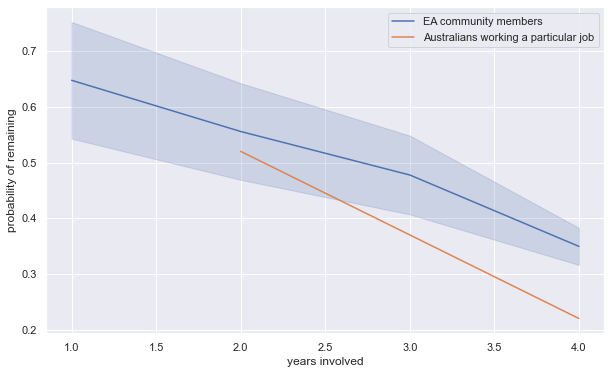

In [5]:
# Figure 1

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data = cumulative,x='years involved',y='probability of remaining',ci='sd',ax=ax,label='EA community members')
sns.lineplot(x=[2,4],y=[0.52,0.22],label='Australians working a particular job')

<AxesSubplot:xlabel='years involved', ylabel='annual probability of dropout'>

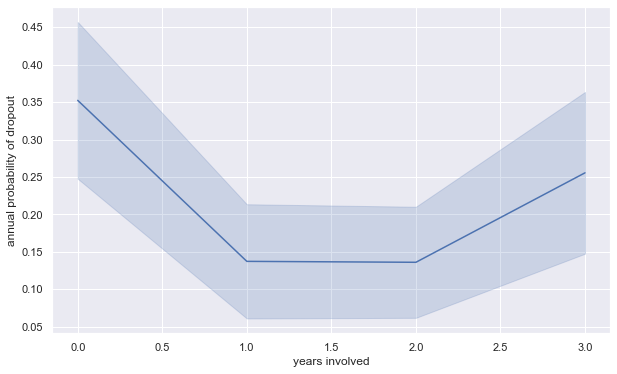

In [12]:
# Figure 2

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data = summary,x='years involved',y='annual probability of dropout',ci='sd',ax=ax)

As we might expect, people who have already been involved for a while are more likely to stay an extra year than people who have just become involved. Unexpectedly, however, for people who have been involved for more than 3 years our estimate of the probability of staying another year is *lower* than for people who have been involved for 1 or 2 years.

We also estimate that a roughly constant number of new people have joined EA in each year since 2015. Again, the bars represent a 67% credible interval.

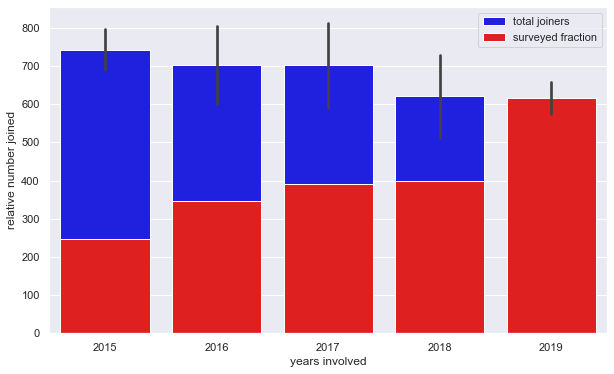

In [7]:
# Figure 3

fullcohort = pd.melt(pd.DataFrame(samples['joined']).rename(columns = {0:2015,1:2016,2:2017,3:2018,4:2019})*2000,
                       value_vars=[2015,2016,2017,2018,2019],
                       var_name = 'years involved', 
                       value_name = 'relative number joined')
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data = fullcohort,x='years involved',y='relative number joined',ci='sd',ax=ax,color='blue',label='total joiners')
sns.barplot(x=[2015,2016,2017,2018,2019],y=REMAINING_2019*2000,ax=ax,color='red',label='surveyed fraction')
ax.legend()



## How this was calculated

To inform your own judgement of how reliable these results are, or if you would like to reproduce and extend them, it will help to understand how they were calculated.

The EA survey asks respondents to tell us in which year they joined EA

Text(0, 0.5, 'Number of respondents')

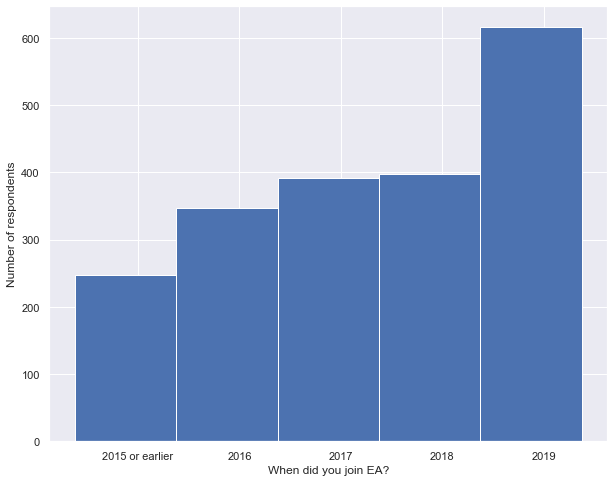

In [8]:
# Figure 4

data['When joined EA'].hist(figsize=(10,8),bins=5)
plt.xticks([2015.5,2016.3,2017.1,2017.9,2018.7],['2015 or earlier','2016','2017','2018','2019'])
plt.xlabel('When did you join EA?')
plt.ylabel('Number of respondents')

We can see that fewer respondents joined in 2015 or earlier than 2016, fewer in 2016 than 2017 and so forth.

We cannot directly deduce the number of people who dropped out from this data. It is compatible with very few dropouts and growing numbers of new members, or many dropouts and flat or declining numbers of new members.

However, we can observe that few dropouts we expect to see many more EA community members in 2019 than in 2015, while with many dropouts we can expect the numbers in 2019 to only be modestly more than in 2015. Thus if we have information on the relative size of the movement from 2015 until 2019, in conjunction with the data above we can estimate the number of dropouts in each year.

To estimate the relative size of the EA movement in these years, we use GiveWell donor estimates from [2016](https://files.givewell.org/files/metrics/GiveWell_Metrics_Report_2016.pdf) and from [2019](https://files.givewell.org/files/metrics/GiveWell_Metrics_Report_2016.pdf), which give us the following numbers of donors:

|Year|Donors|
|---|---|
|2015|2395|
|2016|2916|
|2017|4150|
|2018|4587|
|2019|5669|

We can then set up a set of equations that demand that the sum of people who have joined before year $n$ less the people have dropped out, normalised so the sum in 2019 is equal to 1, is equal to the total number of donors in year $n$, normalised so that the total number in 2019 is equal to 1.

All of these figures are estimated with uncertainty, so these equations will not be satisfied exactly. To deal with this, I set up a Bayesian model that demands that these relationships hold probabilistically.

While the total numbers who responded to the survey and who donated to GiveWell organisations may be quite different, all we need are the numbers relative to a baseline of 2019. Thus we need to assume that the proportion of EA community members who were included in GiveWell donor estimates was constant across these years, as was the proportion who responded to the survey. Furthermore, in the case of the survey in particular, we need to assume that the proportion of people who had been involved for $n$ years and answered the survey depended on $n$ only via the chance of dropping out of the movement altogether.

## The mystery of 2015

Counter to expectations, the likelihood of dropout for people who joined in 2015 or earlier is higher than the likelihood of dropout than for people who joined in 2016 or 2017.

### It's not due to the prior

A Bayesian model was used to calculate the estimated rates of dropout, but the 2015 rate of dropout was not due to the choice of prior. Below we compare the prior to posterior estimates:

<AxesSubplot:xlabel='years involved', ylabel='annual probability of dropout'>

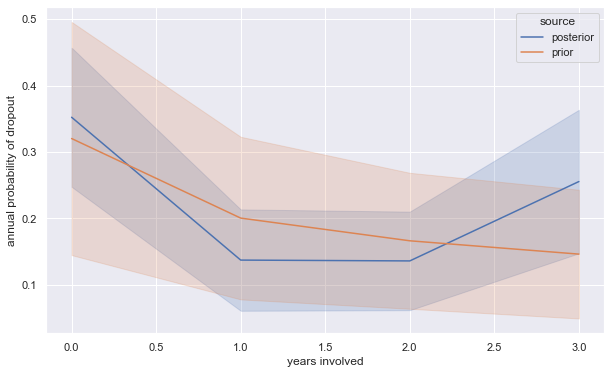

In [9]:
# Figure 5
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data = noflat,x='years involved',y='annual probability of dropout',ci='sd',hue='source',ax=ax)

We can see that the posterior has converged somewhat, and that the rise in dropouts for people involved 3 years runs counter to the prior assumptions I made. Furthermore, if I use a flat prior that does not assume long-time members are more likely to stay than recent arrivals, this effect is somewhat more pronounced:

<AxesSubplot:xlabel='years involved', ylabel='annual probability of dropout'>

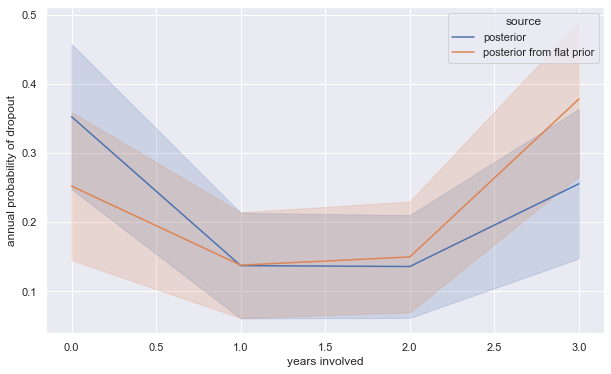

In [10]:
# Figure 6
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data = noprior,x='years involved',y='annual probability of dropout',ci='sd',hue='source',ax=ax)

It is the case that 2015 is different to other years in that every other year only contains the responses of people who joined in that year, while people who joined in 2013, 2014 or 2015 will all have responded that they joined in 2015. However, this suggests that the number of respondents saying "2015 or earlier" should be larger than expected given trends observed in other years, while if anything we actually observe *fewer* than expected responses here. Lets look at figure 4, the graph of survey responses to "when did you join EA?", again:

Text(0, 0.5, 'Number of respondents')

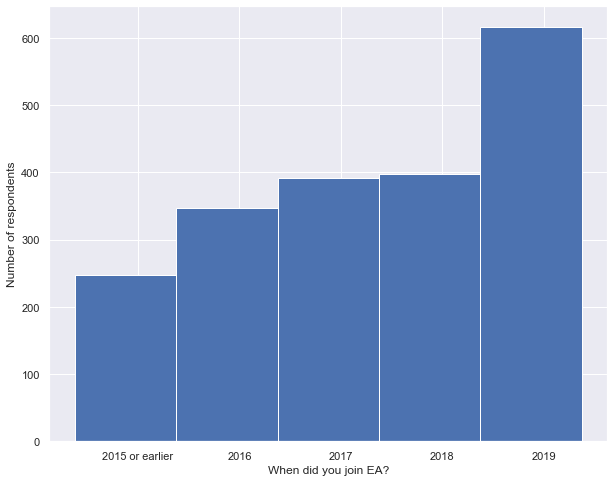

In [11]:
# Figure 4
data['When joined EA'].hist(figsize=(10,8),bins=5)
plt.xticks([2015.5,2016.3,2017.1,2017.9,2018.7],['2015 or earlier','2016','2017','2018','2019'])
plt.xlabel('When did you join EA?')
plt.ylabel('Number of respondents')

We see a large drop in numbers between 2019 and 2018, and also a large drop in numbers between 2016 and 2015. These drops in number have to be explained somehow, and the model I used explained them with elevated dropout rates for these years.

It is plausible that dropout rates are simply quite variable year-to-year for reasons that are difficult to explain (these changes are large compared to expected variation from sampling error).

The EA survey data provided was also preprocessed in an unknown way, and it is possible that this preprocessing might have altered the distribution of the years in which people report joining.

# Conclusion

It appears that people who are involved enough in EA to complete the survey are somewhat more likely to remain in the community for 3+ years than Australian workers are to remain in their jobs for the same perior. However, the results conflict with assumptions and there are particular reasons to think they might not be robust, so one should consider their prior expectations and other sources of evidence when contemplating the question of how long people remain in the community.

Finally, even if these results accurately reflect reality, they do not establish a clear trend and so are not easily used for extrapolating community member longevity for longer periods of time (though even in the best case, extrapolation is difficult).

# Appendix: Working notes

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pingouin

import jax.numpy as jnp
from jax import random, vmap

import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS

In [4]:
sheet_url = "https://docs.google.com/spreadsheets/d/1pdWo_Q4FyHkL_E12zrp63HQA3txPs4TNGP2MgvO3Kfk/export?format=csv&id=1pdWo_Q4FyHkL_E12zrp63HQA3txPs4TNGP2MgvO3Kfk&gid=0"
    
data = pd.read_csv(sheet_url,index_col=0)
data.columns = data.columns.str.strip(' ')
data.head()

,student,Global Poverty,Homelessness,Mental health,Asteroid collisions,Nuclear warfare,Pandemic preparedness,Engagement,Region,When joined EA
subject,,,,,,,,,,
1,0,4,5,4,5,5,5,(3) Moderate engagement,USA/Canada,2019 or later
2,1,5,5,5,4,4,3,(2) Mild engagement,USA/Canada,2018
3,1,5,6,4,3,4,5,(3) Moderate engagement,Rest of world,2019 or later
4,0,6,6,4,2,3,4,(2) Mild engagement,USA/Canada,2017
5,1,5,4,2,4,4,4,(4) Considerable engagement,USA/Canada,2019 or later


In [5]:
# Not sure if it's been edited by hand, let's check if labels are consistent

for col in data.columns:
    print(data[col].unique())

[0 1]
['4' '5' '6' '2' '3' '(7) Highly important' '(1) Not at all important']
['5' '6' '4' '2' '3' '(7) Highly important' '(1) Not at all important']
['4' '5' '2' '6' '3' '(7) Highly important' '(1) Not at all important']
['5' '4' '3' '2' '6' '(7) Highly important' '(1) Not at all important']
['5' '4' '3' '6' '2' '(7) Highly important' '(1) Not at all important']
['5' '3' '4' '6' '(7) Highly important' '2' '(1) Not at all important']
['(3) Moderate engagement' '(2) Mild engagement'
 '(4) Considerable engagement' '(1) No engagement' '(5) High engagement']
['USA/Canada' 'Rest of world' 'UK' 'Europe']
['2019 or later' '2018' '2017' '2015 or before' '2016']


In [6]:
# Looks good. Let's take a simple approach to making the data numeric
# may wish to revisit the "year joined" method later, as "2015 or before" != 2015

repl = lambda m: m.group(0)

for col in data.columns:
    if data[col].dtype == object:
        if data[col].str.contains('[0-9]').any():
            data[col] = data[col].str.replace('[^0-9]',"").astype(int)
            print(data[col].unique())

[4 5 6 2 3 7 1]
[5 6 4 2 3 7 1]
[4 5 2 6 3 7 1]
[5 4 3 2 6 7 1]
[5 4 3 6 2 7 1]
[5 3 4 6 7 2 1]
[3 2 4 1 5]
[2019 2018 2017 2015 2016]


/tmp/ipykernel_58132/1668277995.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data[col] = data[col].str.replace('[^0-9]',"").astype(int)


array([[<AxesSubplot:title={'center':'student'}>,
        <AxesSubplot:title={'center':'Global Poverty'}>,
        <AxesSubplot:title={'center':'Homelessness'}>],
       [<AxesSubplot:title={'center':'Mental health'}>,
        <AxesSubplot:title={'center':'Asteroid collisions'}>,
        <AxesSubplot:title={'center':'Nuclear warfare'}>],
       [<AxesSubplot:title={'center':'Pandemic preparedness'}>,
        <AxesSubplot:title={'center':'Engagement'}>,
        <AxesSubplot:title={'center':'When joined EA'}>]], dtype=object)

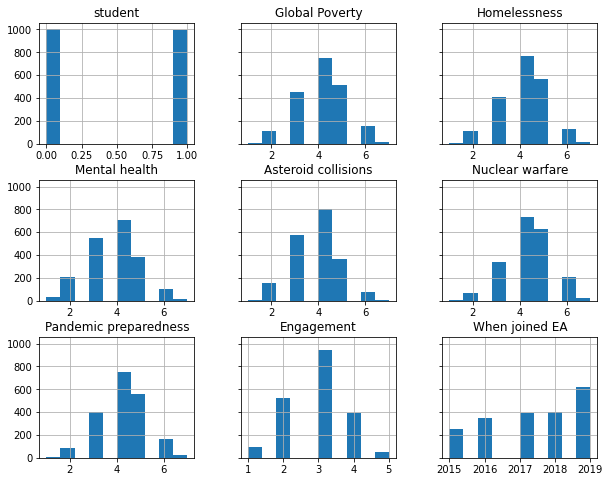

In [7]:
# Looks a bit cruddy without fine-tuning bins, but you get the idea

data.hist(figsize=(10,8),sharey=True)

Text(0, 0.5, 'Number of respondents')

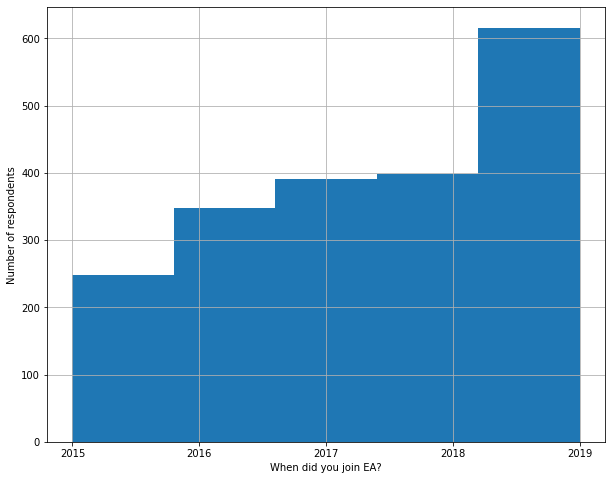

In [36]:
data['When joined EA'].hist(figsize=(10,8),bins=5)
plt.xticks([2015,2016,2017,2018,2019])
plt.xlabel('When did you join EA?')
plt.ylabel('Number of respondents')

The 2019 cohort is larger than the previous cohorts, which could be either due to containing 2020ers or because "people who have been involved for more than 1 year are more likely to stay for additional years than people who have not yet been involved for 1 year" (as I initially guessed). Overall, I don't think I will be able to do better than guess "2019 or later" == 2019.

I find the lack of extra examples in 2015 surprising, because it should include 2014, 2013 and so forth. It seems that [there really was rapid growth](https://files.givewell.org/files/metrics/GiveWell_Metrics_Report_2016.pdf#page=8) from 2014-2015, so most of the "2015 and before" cohort might indeed be 2015 joiners.

I might reconsider this if I have time at the end, but for now I'm going to suppose that "2015 and before" is just the 2015 cohort. I initially tried to assign 2/3rds to the 2015 cohort and 1/3rd to the 2014 cohort, but couldn't get the model below to converge and I'd rather move on than spend a long time trouble shooting.

<AxesSubplot:>

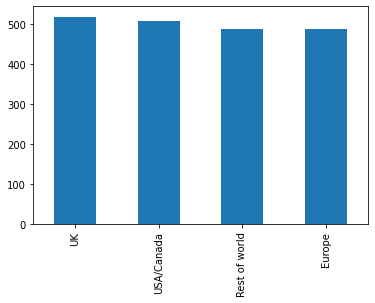

In [8]:
data['Region'].value_counts().plot.bar()

I'm going to try to estimate the hazard ratio, because I'm curious to know what it is. The "n-year hazard ratio" is the probability someone who has been involved in EA drops out after n years. I'm going to set priors with an initial guess that the hazard ratios are 1/3 for 1 year, 1/5 for 2 years, 1/6 for 3 years and so on. This was mainly to get a roughly even distribution of joining dates.

Using GiveWell donor estimates to guess the total size of the EA movement.

Even though I actually expect there to be some drift in the relationship between EA movement size and GiveWell donor counts, I treat the error in this estimate as an independent 10% each year.

In [9]:
# 2015, 2016, 2017, 2018, 2019
# Normalised to 1 EA member in 2019

# Calculates the remaining members who joined in each year since 2015 given 
#  - The hazard rates for each cohort (annual % chance of dropping out after being involved i years)
#  - The total number who joined in each year since 2015
#  - A final year of y
def member_decay(hazards, joineds, y):
    cum_hazards = jnp.array([(1-hazards[:i]).prod() for i in range(y)])[::-1]
    return cum_hazards*joineds[:y]

# Calculates the total members who joined in each year since 2015 given 
#  - The hazard rates for each cohort (annual % chance of dropping out after being involved i years)
#  - The remaining number who joined in each year since 2015
#  - A final year of y
def inverse_member_decay(hazards, remaining, y):
    cum_hazards = jnp.array([(1-hazards[:i]).prod() for i in range(y)])[::-1]
    return remaining[:y]/cum_hazards

EA_TOTAL = jnp.array([2395, 2916, 4150, 4587, 5669])/5669
#EA_TOTAL = jnp.array([1044,2395, 2916, 4150, 4587, 5669])/5669

# Split the 2015 cohort
REMAINING_2019 = data['When joined EA'].value_counts()[::-1].values/2000
# REMAINING_2019 = np.array([REMAINING_2019[0]*1/3] + [REMAINING_2019[0]*2/3] + list(REMAINING_2019[1:]))

TEST_HAZARDS = jnp.array([1/3,1/5,1/6,1/7]) # For testing purposes only
TEST_JOINED = inverse_member_decay(TEST_HAZARDS,REMAINING_2019,5) # For testing purposes only

# Model of member counts and dropout
# The relationship between total number joined each year and remaining cohort from that year is given by functions
# above

# Also assume that there's noise in actual number who join, reported member totals and reported cohort size
# Just set noise to normal distribution with 1SD = 10% reported value in each case, didn't think about it too hard
# The model doesn't converge if I try to use sampling error for the noise, which isn't appropriate anyway
# Because GiveWell donors and survey respondents aren't from the same population

def model(obs_members = None, obs_remaining = None,beta_c1 = None, beta_c2 = None):
    hazards = numpyro.sample('hazard',dist.Beta(beta_c1,beta_c2)) #needs an additional component if you want to split 2015
    joined_est = inverse_member_decay(hazards,obs_remaining,len(obs_remaining))
    joined = numpyro.sample('joined', dist.Normal(joined_est,joined_est*0.1))
    members = jnp.array([member_decay(hazards, joined, y).sum() for y in range(1,1+len(obs_members))])
    meas_members = numpyro.sample('meas_members',dist.Normal(members,members*0.1),obs=obs_members)
    remaining = member_decay(hazards, joined, len(obs_members))
    reported_remain = numpyro.sample('reported_remaining',dist.Normal(remaining,remaining*0.1),obs=obs_remaining)

def prior_only(obs_members = None, obs_remaining = None, beta_c1 = None, beta_c2 = None):
    hazards = numpyro.sample('hazard',dist.Beta(beta_c1,beta_c2))
    joined_est = inverse_member_decay(hazards,obs_remaining,len(obs_remaining))
    joined = numpyro.sample('joined', dist.Normal(joined_est,joined_est*0.1))
    
def run_samples(model,
                obs_members = EA_TOTAL, 
                obs_remaining = REMAINING_2019,
                beta_c1 = [2,2,2,2],
                beta_c2 = [4,8,10,12],
                num_warmup = 2000, 
                num_samples = 2000):
    # Start from this source of randomness. We will split keys for subsequent operations.
    rng_key = random.PRNGKey(0)
    rng_key, rng_key_ = random.split(rng_key)

    # Run NUTS.
    kernel = NUTS(model)
    mcmc = MCMC(kernel, num_warmup=num_warmup, num_samples=num_samples)
    mcmc.run(rng_key_, obs_members = obs_members, obs_remaining = obs_remaining, beta_c1 = beta_c1, beta_c2 = beta_c2)
    mcmc.print_summary()
    samples_1 = mcmc.get_samples()
    return samples_1

samples = run_samples(model)
samples_prior = run_samples(prior_only)
samples_flat = run_samples(model, beta_c2 = [4,4,4,4])

sample: 100%|█| 4000/4000 [00:03<00:00, 1257.02it/s, 15 steps of size 1.56e-01. 



                mean       std    median      5.0%     95.0%     n_eff     r_hat
 hazard[0]      0.35      0.10      0.36      0.18      0.53    828.34      1.00
 hazard[1]      0.14      0.08      0.13      0.02      0.25   1931.98      1.00
 hazard[2]      0.14      0.07      0.13      0.01      0.24   1772.01      1.00
 hazard[3]      0.26      0.11      0.25      0.09      0.44   1079.49      1.00
 joined[0]      0.37      0.03      0.37      0.33      0.41   1620.42      1.00
 joined[1]      0.35      0.05      0.35      0.27      0.43    903.55      1.00
 joined[2]      0.35      0.06      0.35      0.26      0.45    822.93      1.00
 joined[3]      0.31      0.05      0.30      0.22      0.40    801.54      1.00
 joined[4]      0.31      0.02      0.31      0.27      0.34   2029.71      1.00

Number of divergences: 0


sample: 100%|█| 4000/4000 [00:02<00:00, 1699.97it/s, 63 steps of size 1.04e-01. 



                mean       std    median      5.0%     95.0%     n_eff     r_hat
 hazard[0]      0.32      0.18      0.30      0.03      0.57    293.44      1.01
 hazard[1]      0.20      0.12      0.18      0.01      0.37   1072.48      1.00
 hazard[2]      0.17      0.10      0.15      0.01      0.31   1156.17      1.00
 hazard[3]      0.15      0.10      0.13      0.00      0.29   1574.49      1.00
 joined[0]      0.38      0.20      0.33      0.16      0.57    142.39      1.02
 joined[1]      0.44      0.23      0.39      0.20      0.67    148.16      1.02
 joined[2]      0.41      0.21      0.36      0.20      0.61    154.37      1.02
 joined[3]      0.32      0.16      0.29      0.18      0.47    170.52      1.02
 joined[4]      0.31      0.03      0.31      0.26      0.36   1277.89      1.00

Number of divergences: 1


sample: 100%|█| 4000/4000 [00:03<00:00, 1295.73it/s, 15 steps of size 1.32e-01. 



                mean       std    median      5.0%     95.0%     n_eff     r_hat
 hazard[0]      0.25      0.11      0.25      0.07      0.41    704.11      1.00
 hazard[1]      0.14      0.08      0.13      0.02      0.25   1577.26      1.00
 hazard[2]      0.15      0.08      0.14      0.01      0.26   1333.60      1.01
 hazard[3]      0.38      0.11      0.39      0.21      0.56    796.90      1.00
 joined[0]      0.38      0.03      0.38      0.33      0.43   1542.85      1.00
 joined[1]      0.31      0.05      0.31      0.23      0.39    749.33      1.00
 joined[2]      0.30      0.05      0.30      0.22      0.38    654.33      1.00
 joined[3]      0.27      0.04      0.26      0.20      0.33    759.66      1.00
 joined[4]      0.31      0.02      0.31      0.27      0.34   1646.96      1.00

Number of divergences: 0


In [20]:
samples['cumulative'] =  jnp.cumprod(1-samples['hazard'],axis=1)

In [23]:
hazard_rates = pd.melt(pd.DataFrame(samples['hazard']),
                       value_vars=[0,1,2,3],
                       var_name = 'years involved', 
                       value_name = 'annual probability of dropout')

hazard_prior = pd.melt(pd.DataFrame(samples_prior['hazard']),
                       value_vars=[0,1,2,3],
                       var_name = 'years involved', 
                       value_name = 'annual probability of dropout')
hazard_flat = pd.melt(pd.DataFrame(samples_flat['hazard']),
                       value_vars=[0,1,2,3],
                       var_name = 'years involved', 
                       value_name = 'annual probability of dropout')

cumulative = pd.melt(pd.DataFrame(samples['cumulative']),
                       value_vars=[0,1,2,3],
                       var_name = 'years involved', 
                       value_name = 'probability of remaining')
cumulative['years involved']+= 1

hazard_rates['source'] = 'posterior'
hazard_prior['source'] = 'prior'
hazard_flat['source'] = 'posterior from flat prior'


hazard_rates = hazard_rates.append(hazard_prior).append(hazard_flat)

<AxesSubplot:xlabel='years involved', ylabel='probability of remaining'>

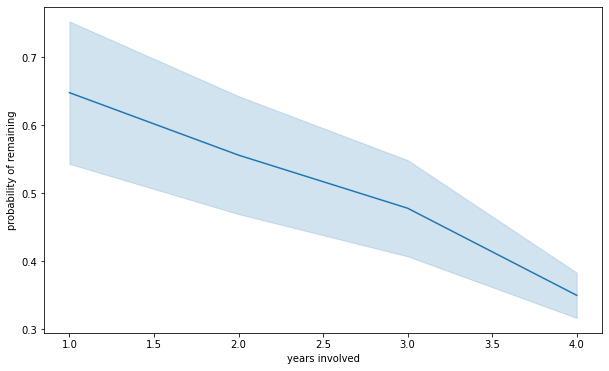

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data = cumulative,x='years involved',y='probability of remaining',ci='sd',ax=ax)

Annual probability of dropout seems to fall after the first year of involvement

<AxesSubplot:xlabel='years involved', ylabel='annual probability of dropout'>

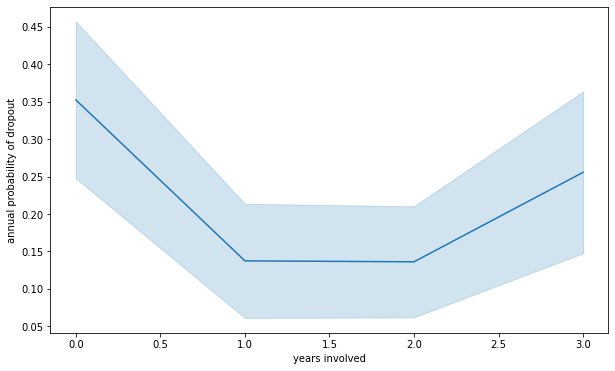

In [26]:
summary = hazard_rates[(hazard_rates['source']=='posterior')]

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data = summary,x='years involved',y='annual probability of dropout',ci='sd',ax=ax)

For people involved 3 years or longer, the model treats them all as being involved for exactly 3 years, while a substantial number may have been involved 4+ years. This means that the "3 year annual dropout rate" isn't well-specified. However, if the 0, 1 and 2 year rates are correct I think this should bias the result down, not up because the 4 year cohort should drop out less than expected, and this is the opposite of what we find.

This seems to be related to the comment I made at the outset - that there are surprisingly few people in the "2015 or before" cohort, which the model accounts for by giving just this cohort a very high dropout rate.

The model also wants to say that most people joined in the earlier years, which I think is wrong, but this doesn't seem to depend strongly on the priors.

As mentioned above, I tried a crude method to address this, but didn't get the model to converge.

The prior is also plotted to show how the posterior differs.

<AxesSubplot:xlabel='years involved', ylabel='annual probability of dropout'>

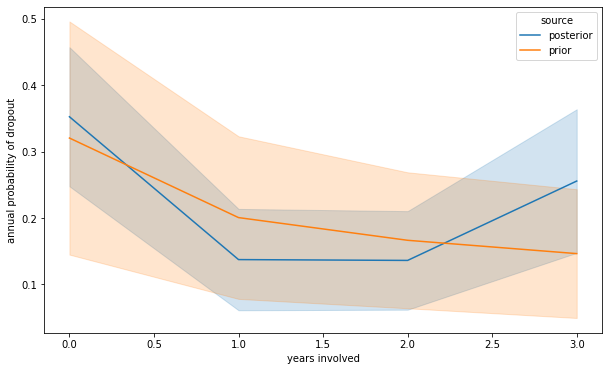

In [13]:
noflat = hazard_rates[hazard_rates['source']!='posterior from flat prior']

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data = noflat,x='years involved',y='annual probability of dropout',ci='sd',hue='source',ax=ax)

<AxesSubplot:xlabel='years involved', ylabel='annual probability of dropout'>

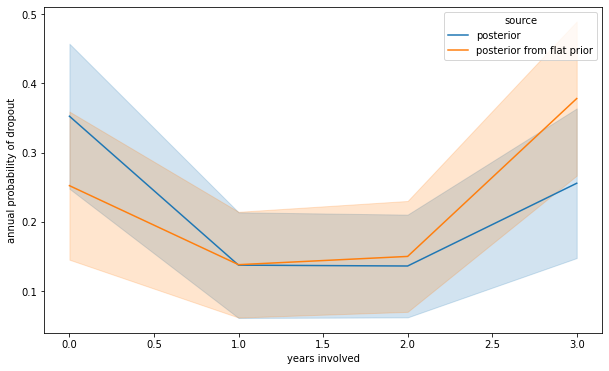

In [14]:
noprior = hazard_rates[hazard_rates['source']!='prior']

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data = noprior,x='years involved',y='annual probability of dropout',ci='sd',hue='source',ax=ax)

We can also visualise how many people would have been picked up by the survey if dropouts and engaged EA community members both participated. As mentioned, I don't think the result with most joiners in 2015 is realistic.

/home/davidj/Code/environments/rethinkpriorities/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


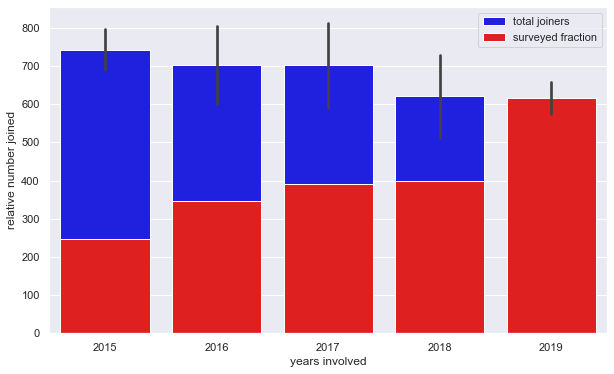

In [47]:
fullcohort = pd.melt(pd.DataFrame(samples['joined']).rename(columns = {0:2015,1:2016,2:2017,3:2018,4:2019})*2000,
                       value_vars=[2015,2016,2017,2018,2019],
                       var_name = 'years involved', 
                       value_name = 'relative number joined')
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data = fullcohort,x='years involved',y='relative number joined',ci='sd',ax=ax,color='blue',label='total joiners')
sns.barplot([2015,2016,2017,2018,2019],REMAINING_2019*2000,ax=ax,color='red',label='surveyed fraction')
ax.legend()

In [16]:
np.diff(EA_TOTAL*2000)

array([183.8067 , 435.3501 , 154.17175, 381.72522], dtype=float32)

It's not clear in the GiveWell data that there is a trend towards larger numbers of recruits in later years, so this weak prediction of more recruits in 2015 than 2019 isn't absurd, but it doesn't seem right to me.